# Исследование поведения пользователей демо-аккаунтов

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Загрузка-и-первичное-изучение-данных" data-toc-modified-id="Загрузка-и-первичное-изучение-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и первичное изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Определение-пользовательских-сессий" data-toc-modified-id="Определение-пользовательских-сессий-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Определение пользовательских сессий</a></span><ul class="toc-item"><li><span><a href="#Выделение-демо" data-toc-modified-id="Выделение-демо-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выделение демо</a></span></li></ul></li><li><span><a href="#Анализ-активных-демо-аккаунтов" data-toc-modified-id="Анализ-активных-демо-аккаунтов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ активных демо-аккаунтов</a></span><ul class="toc-item"><li><span><a href="#Используемые-шаблоны-и-пользователи" data-toc-modified-id="Используемые-шаблоны-и-пользователи-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Используемые шаблоны и пользователи</a></span></li><li><span><a href="#Частота-создания-и-обновления-аккаунтов" data-toc-modified-id="Частота-создания-и-обновления-аккаунтов-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Частота создания и обновления аккаунтов</a></span></li><li><span><a href="#Количество,-продолжительность-и-частота-сессий-и-демо" data-toc-modified-id="Количество,-продолжительность-и-частота-сессий-и-демо-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Количество, продолжительность и частота сессий и демо</a></span></li><li><span><a href="#Сроки-&quot;жизни&quot;-аккаунтов" data-toc-modified-id="Сроки-&quot;жизни&quot;-аккаунтов-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Сроки "жизни" аккаунтов</a></span></li></ul></li><li><span><a href="#Анализ-активности-пользователей" data-toc-modified-id="Анализ-активности-пользователей-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Анализ активности пользователей</a></span><ul class="toc-item"><li><span><a href="#Количество-активных-аккаунтов-на-пользователя,-частота-создания-и-обновления" data-toc-modified-id="Количество-активных-аккаунтов-на-пользователя,-частота-создания-и-обновления-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Количество активных аккаунтов на пользователя, частота создания и обновления</a></span></li><li><span><a href="#Количество-и-частота-сессий-и-демо-на-пользователя" data-toc-modified-id="Количество-и-частота-сессий-и-демо-на-пользователя-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Количество и частота сессий и демо на пользователя</a></span></li><li><span><a href="#Степень-использования-рекомендуемого-шаблона-и-пользователей" data-toc-modified-id="Степень-использования-рекомендуемого-шаблона-и-пользователей-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Степень использования рекомендуемого шаблона и пользователей</a></span></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

**Подготовка к работе**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import os
import re
from datetime import datetime as dt

In [2]:
plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', '{:.2f}'.format)
# укоротить дроби
pd.set_option('display.max_colwidth', None)
pd.set_option('display.min_rows', 20)
pd.set_option('display.max_columns', None)
# для удобства чтения
pd.options.mode.chained_assignment = None

In [3]:
def first_look(df):
    """
    функция первичного осмотра датафрейма
    """
    print('Info:')
    df.info()
    print('*'*100, end='\n\n')
    print('Head:')
    display(df.head())
    print('*'*100, end='\n\n')
    print('Sample:')
    display(df.sample(5))
    print('*'*100, end='\n\n')
    print('Description:')
    display(df.describe())
    print('*'*100, end='\n\n')
    print('Duplicates:')
    display(df.duplicated().sum())
    print('*'*100, end='\n\n')
    print('Missing values:')
    display(df.isna().sum())

def get_path(filename):
    """
    ищет файл по имени на компьютере
    
    принимает имя файла строкой, возвращает путь к файлу
    """
    for drive in ['C:\\','D:\\','E:\\','F:\\','G:\\','H:\\']: #список дисков по-моему нормально никак не вытащить, полудюжины хватит
        print('Проверяем диск', drive)
        for batch in os.walk(drive, followlinks=False):
            for file in batch[2]:
                if file == filename:
                    return (os.path.join(batch[0], file))

def load_data(name):
    """
    загружает данные из файла, ищет на компьютере
    
    name - название файла строкой
    """
    try:
        if '.csv' in name:
            df = pd.read_csv(get_path(name), sep=None, engine='python')
        elif '.xlsx' in name:
            df = pd.read_excel(get_path(name))
        else:
            print('Проверьте тип файла:', name)
            return None
        print(name, 'загружено из файла')
        return df
    except:
        print('Не удалось загрузить: ', name)

## Введение

**Описание проекта**

Демо-аккаунты - специальные аккаунты, используемые при работе с клиентами для проведения демонстраций продукта. Существует инфраструктура, позволяющая быстро создавать аккаунты (и обновлять уже существующие), настроенные должным образом и содержащие весь необходимый контент, что избавляет линейных сотрудников от необходимости тратить время и усилия на подготовку аккаунтов.  
  
Основная задача команды демо инженеров - создание и обновление шаблонов демо-аккаунтов для обеспечения соответствия демо-аккаунтов текущему состоянию продукта и оптимальному способу проведения демо.  

При этом ни у демо инженеров, ни у руководителей отделов продаж и customer success нет практически никакой информации о том, какие демо-аккаунты используются на самом деле для проведения демо (и используются ли вообще), ни о том, насколько качественно проводятся сами демо.  

Более того, без понимания привычек и предпочтений пользователей сложно планировать дальнейшее развитие инфраструктуры демо-аккаунтов.

Цель нашего проекта - изучить возможность определения активности в демо-аккаунтах на основании продуктовых событий (на примере событий из группы домашней страницы), а также оценить возможность оценки качества индивидуальных демо на основании всех доступных в базе данных событий.

**План проекта**  

1. Загрузка и первичное изучение данных
2. Предобработка данных (пропуски, дубликаты, аномалии)
3. Определение пользовательских сессий на основании событий в продукте, отделение демо от остальных сессий
4. Анализ активных демо аккаунтов:
    1. Используемые шаблоны и пользователи
    2. Частота создания и обновления аккаунтов
    3. Количество, продолжительность и частота сессий и демо
    4. Сроки "жизни" аккаунтов
5. Анализ активности пользователей
    1. Количество активных аккаунтов на пользователя, частота создания и обновления
    2. Количество и частота сессий и демо на пользователя
    3. Степень использования рекомендуемого шаблона и пользователей
6. Выводы и рекомендации  

## Загрузка и первичное изучение данных

In [4]:
accounts = load_data('demo_account_raw.csv')
events = load_data('demo_home_events.csv')
operations = load_data('domain_operation_raw.csv')
dfs = [accounts, events, operations]

Проверяем диск C:\
demo_account_raw.csv загружено из файла
Проверяем диск C:\
demo_home_events.csv загружено из файла
Проверяем диск C:\
domain_operation_raw.csv загружено из файла


In [5]:
for df in dfs:
    first_look(df)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   account_id  1649 non-null   int64 
 1   Demo Owner  1649 non-null   int64 
 2   Demo Start  1649 non-null   object
dtypes: int64(2), object(1)
memory usage: 38.8+ KB
****************************************************************************************************

Head:


,account_id,Demo Owner,Demo Start
0,5053226,11699385,2021-10-14T06:38:38.550923
1,5053228,11699385,2021-10-14T06:38:57.764450
2,5359668,12521302,2022-02-15T10:11:48.787832
3,5391484,12733262,2022-03-07T06:13:01.423728
4,5391486,12733262,2022-03-07T06:13:13.479985


****************************************************************************************************

Sample:


,account_id,Demo Owner,Demo Start
72,5368386,11109555,2022-02-22T19:41:38.097245
360,5031431,11648933,2021-10-06T06:55:05.595066
1355,3880449,6564088,2020-06-15T08:52:09.494795
953,3867486,7681423,2020-06-09T08:22:43.288198
570,5359441,12521675,2022-02-15T07:08:53.597748


****************************************************************************************************

Description:


,account_id,Demo Owner
count,1649.00,1649.00
mean,4665320.88,8547842.61
std,876580.47,3519959.70
min,3112876.00,485815.00
25%,3930899.00,5910259.00
50%,5026012.00,9145020.00
75%,5399291.00,11699270.00
max,5718379.00,13928878.00


****************************************************************************************************

Duplicates:


0

****************************************************************************************************

Missing values:


account_id    0
Demo Owner    0
Demo Start    0
dtype: int64

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576102 entries, 0 to 576101
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Fname           576102 non-null  object
 1   Lname           576102 non-null  object
 2   Account         576102 non-null  int64 
 3   User ID         576102 non-null  int64 
 4   Event Datetime  576102 non-null  object
 5   Event Type      576102 non-null  object
dtypes: int64(2), object(4)
memory usage: 26.4+ MB
****************************************************************************************************

Head:


,Fname,Lname,Account,User ID,Event Datetime,Event Type
0,Melanie,Davis,2342370,4828743,2022-09-09 01:12:56.127,recommended_tasks__show
1,Melanie,Davis,2342370,4828743,2022-09-09 01:19:26.679,homepage__opened
2,Axel,Fitte-Duval,4571779,10427847,2022-09-09 01:46:04.604,recommended_tasks__show
3,Melanie,Davis,2342370,4828743,2022-09-09 01:19:15.290,homepage__opened
4,Billing,Administrator,5725398,14561167,2022-09-09 08:54:04.319,homepage__opened


****************************************************************************************************

Sample:


,Fname,Lname,Account,User ID,Event Datetime,Event Type
473682,Account,Owner,4277659,11819173,2022-05-25 10:14:48.830,navigation_element__click
184432,Ray,Flynn,5229873,12219932,2022-09-01 06:24:45.617,section__click
186747,Alex,Underwood,5026042,11638609,2022-07-26 12:14:33.628,recommended_tasks__show
166767,CEO,Thomas,5290341,13547559,2022-08-24 09:12:44.786,navigation_element__click
14963,Jerry,Bruckheimer,5114382,11872327,2022-04-01 15:47:04.869,section__click


****************************************************************************************************

Description:


,Account,User ID
count,576102.00,576102.00
mean,4912758.62,11636485.94
std,696665.44,1820530.95
min,5.00,2663603.00
25%,4588822.00,10792480.00
50%,5099495.00,11879741.00
75%,5390355.00,12862041.00
max,5742644.00,14830175.00


****************************************************************************************************

Duplicates:


91892

****************************************************************************************************

Missing values:


Fname             0
Lname             0
Account           0
User ID           0
Event Datetime    0
Event Type        0
dtype: int64

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Operation ID    5558 non-null   int64 
 1   operation_type  5558 non-null   object
 2   Datetime        5558 non-null   object
 3   operation_data  5558 non-null   object
 4   Resetter ID     5558 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 217.2+ KB
****************************************************************************************************

Head:


,Operation ID,operation_type,Datetime,operation_data,Resetter ID
0,224790,DemoAccountsDumpRestore,2019-09-11T10:08:01.894544,"{""salesUserId"":3766163,""templateId"":3075994,""demoId"":3079913}",6201711
1,226837,DemoAccountsDumpRestore,2019-09-25T08:00:14.760975,"{""salesUserId"":5631945,""templateId"":3075994,""demoId"":3112870}",6201711
2,226838,DemoAccountsDumpRestore,2019-09-25T08:01:06.990996,"{""salesUserId"":3766163,""templateId"":3075994,""demoId"":3112876}",6201711
3,226840,DemoAccountsDumpRestore,2019-09-25T08:26:58.061347,"{""salesUserId"":5595709,""templateId"":3075994,""demoId"":3112974}",6201711
4,226930,DemoAccountsDumpRestore,2019-09-26T00:46:33.941007,"{""salesUserId"":6196165,""templateId"":3075994,""demoId"":3114865}",1388720


****************************************************************************************************

Sample:


,Operation ID,operation_type,Datetime,operation_data,Resetter ID
4077,347665,DemoAccountsFixTimestamp,2022-03-01T10:40:33.965387,"{""templateId"":4365873,""demoAccountId"":5218676,""fixTemplate"":false}",12107925
64,231306,DemoAccountsDumpRestore,2019-10-16T13:52:35.681281,"{""salesUserId"":6603471,""templateId"":3075994,""demoId"":3172481}",1388720
482,244608,DemoAccountsDumpRestore,2020-01-22T06:31:37.356158,"{""salesUserId"":1288532,""templateId"":3075994,""demoId"":3425848}",7193169
609,248796,DemoAccountsFixTimestamp,2020-02-28T01:06:34.183325,"{""templateId"":3075994,""demoAccountId"":3230664,""fixTemplate"":false}",6747589
2732,324662,DemoAccountsFixTimestamp,2021-08-17T05:32:56.958602,"{""templateId"":3075994,""demoAccountId"":3178714,""fixTemplate"":false}",6772988


****************************************************************************************************

Description:


,Operation ID,Resetter ID
count,5558.00,5558.00
mean,313362.51,7364340.86
std,41797.89,3151809.27
min,224790.00,629750.00
25%,269921.50,5781428.00
50%,325718.00,7193169.00
75%,348675.75,10029657.00
max,368849.00,13562544.00


****************************************************************************************************

Duplicates:


0

****************************************************************************************************

Missing values:


Operation ID      0
operation_type    0
Datetime          0
operation_data    0
Resetter ID       0
dtype: int64

Пропусков в таблицах нет, аномальных данных на первый взгляд тоже. Большое количество явных дубликатов в таблице с событиями.

- [x] привести названия столбцов к нижнему регистру и убрать пробелы
- [x] привести даты-время к правильному типу  
- [x] разделить данные об операциях в operations  
- [x] добавить столбец полного имени в операциях
- [x] обработать дубликаты в operations  
- [x] заменить названия доменных операций на читаемые
- [x] выделить операции первичного создания аккаунта (записаны как обновление контента)
- [x] проверить скрытые дубликаты  

## Предобработка данных

In [6]:
for df in dfs:
    df.columns = df.columns.str.replace(' ','_').str.lower()
    display(df.sample())

,account_id,demo_owner,demo_start
756,3258975,7062023,2019-11-18T10:05:50.800093


,fname,lname,account,user_id,event_datetime,event_type
474874,Account,Owner,5373860,12750085,2022-03-23 12:04:09.821,navigation_element__click


,operation_id,operation_type,datetime,operation_data,resetter_id
2815,326450,DemoAccountsDumpRestore,2021-09-02T00:38:04.871157,"{""salesUserId"":10510713,""templateId"":4365873,""demoId"":4825108}",10510713


In [7]:
accounts['demo_start'] = pd.to_datetime(accounts['demo_start'])
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
operations['datetime'] = pd.to_datetime(operations['datetime'])

In [8]:
operations.sample(5)

,operation_id,operation_type,datetime,operation_data,resetter_id
896,265142,DemoAccountsDumpRestore,2020-05-19 10:16:57.430296,"{""salesUserId"":6747589,""templateId"":3075994,""demoId"":3810421}",7193169
1394,269975,DemoAccountsDumpRestore,2020-10-09 14:44:39.925059,"{""salesUserId"":6455750,""templateId"":3075994,""demoId"":4102241}",7193169
4295,350186,DemoAccountsDumpRestore,2022-03-23 14:37:59.296860,"{""salesUserId"":10039476,""templateId"":4365873,""demoId"":5296166}",10039476
2662,322256,DemoAccountsFixTimestamp,2021-07-30 00:39:10.295975,"{""templateId"":3075994,""demoAccountId"":4334724,""fixTemplate"":false}",9740593
4312,350283,DemoAccountsDumpRestore,2022-03-25 02:41:28.978280,"{""salesUserId"":10975644,""templateId"":4365873,""demoId"":5426602}",10975644


In [9]:
def extract_id (text, pat):
    match = re.search(pat, text)
    if match:
        return match.group(1)
    else:
        return np.nan
    
acc_pat = re.compile('"demo.*Id":(\d+)')
template_pat = re.compile('"templateId":(\d+)')
owner_pat = re.compile('"salesUserId":(\d+)')

operations['acc_id'] = operations.operation_data.apply(extract_id, args=(acc_pat,))
operations['template'] = operations.operation_data.apply(extract_id, args=(template_pat,))
operations['owner'] = operations.operation_data.apply(extract_id, args=(owner_pat,))
                                                       
operations.sample(5)

,operation_id,operation_type,datetime,operation_data,resetter_id,acc_id,template,owner
621,249201,DemoAccountsFixTimestamp,2020-03-02 11:11:55.479987,"{""templateId"":3075994,""demoAccountId"":3178710,""fixTemplate"":false}",6564571,3178710,3075994,NaN
4533,353680,DemoAccountsDumpRestore,2022-04-21 03:09:20.184867,"{""salesUserId"":8873126,""templateId"":3075994,""demoId"":5482319}",1787242,5482319,3075994,8873126
1620,291049,DemoAccountsDumpRestore,2020-12-10 05:19:30.943404,"{""salesUserId"":1527212,""templateId"":3075994,""demoId"":3177969}",1527212,3177969,3075994,1527212
1666,293607,DemoAccountsFixTimestamp,2021-01-04 14:04:24.385133,"{""templateId"":3075994,""demoAccountId"":3178807,""fixTemplate"":false}",5230297,3178807,3075994,NaN
1120,269043,DemoAccountsFixTimestamp,2020-07-24 14:42:05.189543,"{""templateId"":3075994,""demoAccountId"":3177897,""fixTemplate"":false}",6455696,3177897,3075994,NaN


In [10]:
events['username'] = events.fname + ' ' + events.lname
events.sample()

,fname,lname,account,user_id,event_datetime,event_type,username
508424,Michael,Scott,5117083,11879741,2022-01-07 12:14:12.013,section__click,Michael Scott


In [11]:
operations['template'] = operations.template.astype('Int64', errors='ignore')
operations['acc_id'] = operations.acc_id.astype('Int64', errors='ignore')
operations['owner'] = operations.owner.astype('Int64', errors='ignore')

In [12]:
events = events.drop_duplicates()
events.duplicated().sum()

0

In [13]:
operations.loc[operations['operation_type']=='DemoAccountsDumpRestore', 'operation_type'] = 'refresh content'
operations.loc[operations['operation_type']=='DemoAccountsFixTimestamp', 'operation_type'] = 'refresh dates'
operations.sample(5)

,operation_id,operation_type,datetime,operation_data,resetter_id,acc_id,template,owner
4858,359064,refresh dates,2022-05-31 12:24:58.678140,"{""templateId"":4365873,""demoAccountId"":5317765,""fixTemplate"":false}",11637851,5317765,4365873,<NA>
3518,341138,refresh content,2021-12-28 02:03:46.073447,"{""salesUserId"":9672486,""templateId"":3075994,""demoId"":4470675}",9672486,4470675,3075994,9672486
1973,299652,refresh content,2021-03-02 10:34:41.141868,"{""salesUserId"":9740593,""templateId"":3075994,""demoId"":4469150}",9740593,4469150,3075994,9740593
644,249601,refresh content,2020-03-06 08:13:00.899058,"{""salesUserId"":7269043,""templateId"":3075994,""demoId"":3560449}",7193169,3560449,3075994,7269043
4331,350690,refresh dates,2022-03-28 09:07:25.583054,"{""templateId"":4365873,""demoAccountId"":5421094,""fixTemplate"":false}",12470696,5421094,4365873,<NA>


In [14]:
operations.operation_type.value_counts()

refresh content    3185
refresh dates      2373
Name: operation_type, dtype: int64

In [15]:
acc_creations = []
missing_records = []

for acc in operations['acc_id'].unique():
    temp = operations[(operations.acc_id == acc) & (operations.operation_type == 'refresh content')].sort_values('datetime')
    if temp.empty==False:
        acc_creations.append(temp.iloc[0]['operation_id'])
    else:
        missing_records.append(acc) # для некоторых аккаунтов запись отсутствует

In [16]:
operations.loc[operations['operation_id'].isin(acc_creations), 'operation_type'] = 'create account'
operations.head(10)

,operation_id,operation_type,datetime,operation_data,resetter_id,acc_id,template,owner
0,224790,create account,2019-09-11 10:08:01.894544,"{""salesUserId"":3766163,""templateId"":3075994,""demoId"":3079913}",6201711,3079913,3075994,3766163
1,226837,create account,2019-09-25 08:00:14.760975,"{""salesUserId"":5631945,""templateId"":3075994,""demoId"":3112870}",6201711,3112870,3075994,5631945
2,226838,create account,2019-09-25 08:01:06.990996,"{""salesUserId"":3766163,""templateId"":3075994,""demoId"":3112876}",6201711,3112876,3075994,3766163
3,226840,create account,2019-09-25 08:26:58.061347,"{""salesUserId"":5595709,""templateId"":3075994,""demoId"":3112974}",6201711,3112974,3075994,5595709
4,226930,create account,2019-09-26 00:46:33.941007,"{""salesUserId"":6196165,""templateId"":3075994,""demoId"":3114865}",1388720,3114865,3075994,6196165
5,226931,create account,2019-09-26 00:49:39.351193,"{""salesUserId"":6484911,""templateId"":3075994,""demoId"":3114876}",1388720,3114876,3075994,6484911
6,226932,create account,2019-09-26 00:54:38.343619,"{""salesUserId"":6274935,""templateId"":3075994,""demoId"":3114890}",1388720,3114890,3075994,6274935
7,226933,create account,2019-09-26 00:57:14.675894,"{""salesUserId"":4836383,""templateId"":3075994,""demoId"":3114898}",1388720,3114898,3075994,4836383
8,226959,refresh content,2019-09-26 07:20:50.500742,"{""salesUserId"":3766163,""templateId"":3075994,""demoId"":3112876}",3766163,3112876,3075994,3766163
9,226981,create account,2019-09-26 10:55:27.488123,"{""salesUserId"":6528906,""templateId"":3075994,""demoId"":3116471}",3016584,3116471,3075994,6528906


In [17]:
operations.duplicated(subset=['operation_id']).sum()

0

In [18]:
operations.duplicated(subset=['acc_id','datetime']).sum()

0

In [19]:
accounts.sample()

,account_id,demo_owner,demo_start
1042,3466682,6196165,2020-02-04 10:56:45.820818


In [20]:
accounts.duplicated(subset=['account_id']).sum()

0

In [21]:
events.sample()

,fname,lname,account,user_id,event_datetime,event_type,username
66331,Lizzie,Bader,3178546,6874987,2022-06-02 09:51:45.402,recommended_tasks__show,Lizzie Bader


In [22]:
events.duplicated(subset=['event_datetime','account','user_id']).sum()

281296

In [23]:
events.duplicated(subset=['event_datetime','event_type']).sum()

4

In [24]:
events[events.duplicated(subset=['event_datetime','account','user_id'])]['account'].value_counts().sort_values(ascending=False)

4990711    17247
5418638     9053
5117045     6952
4049790     5456
4868581     4091
4132808     3860
5026042     3467
4679356     2942
4550303     2843
5218676     2813
           ...  
5686899        1
5695297        1
4395413        1
5026067        1
3973608        1
4825108        1
5317533        1
4709102        1
4868583        1
5718379        1
Name: account, Length: 1692, dtype: int64

In [25]:
events[events['account']==5218676].sort_values('event_datetime')

,fname,lname,account,user_id,event_datetime,event_type,username
353675,Jacob,Jenkins,5218676,12176888,2022-01-26 11:49:29.429,recommended_tasks__show,Jacob Jenkins
353393,Jacob,Jenkins,5218676,12176888,2022-01-26 11:49:29.429,homepage__initialized,Jacob Jenkins
146305,CEO,Thomas,5218676,12177005,2022-01-31 13:09:32.447,recommended_tasks__show,CEO Thomas
146303,CEO,Thomas,5218676,12177005,2022-01-31 13:09:32.447,homepage__initialized,CEO Thomas
146307,CEO,Thomas,5218676,12177005,2022-01-31 13:09:44.044,navigation_element__click,CEO Thomas
119598,CEO,Thomas,5218676,12177005,2022-01-31 13:09:44.044,section__click,CEO Thomas
119597,CEO,Thomas,5218676,12177005,2022-01-31 13:12:29.502,section__click,CEO Thomas
161858,CEO,Thomas,5218676,12177005,2022-01-31 13:12:29.502,homepage__opened,CEO Thomas
129010,CEO,Thomas,5218676,12177005,2022-01-31 13:12:29.502,recommended_tasks__show,CEO Thomas
161856,CEO,Thomas,5218676,12177005,2022-01-31 13:12:36.950,section__click,CEO Thomas


In [26]:
events[events['account']==5418638].groupby('event_datetime')['event_datetime'].value_counts().sort_values(ascending=False)

event_datetime           event_datetime         
2022-09-08 18:13:02.367  2022-09-08 18:13:02.367    8
2022-09-12 19:30:06.215  2022-09-12 19:30:06.215    8
2022-04-29 12:21:43.286  2022-04-29 12:21:43.286    8
2022-07-25 07:43:00.571  2022-07-25 07:43:00.571    7
2022-06-28 10:03:09.902  2022-06-28 10:03:09.902    7
2022-09-09 07:53:07.141  2022-09-09 07:53:07.141    7
2022-06-26 13:53:17.638  2022-06-26 13:53:17.638    7
2022-04-22 07:53:15.041  2022-04-22 07:53:15.041    7
2022-04-21 12:04:39.253  2022-04-21 12:04:39.253    7
2022-08-09 11:56:59.727  2022-08-09 11:56:59.727    7
                                                   ..
2022-04-14 11:34:04.128  2022-04-14 11:34:04.128    1
2022-04-21 21:23:34.266  2022-04-21 21:23:34.266    1
2022-04-14 11:39:44.793  2022-04-14 11:39:44.793    1
2022-07-19 09:27:50.396  2022-07-19 09:27:50.396    1
2022-07-08 10:28:41.362  2022-07-08 10:28:41.362    1
2022-05-02 13:05:37.725  2022-05-02 13:05:37.725    1
2022-07-08 10:27:25.248  2022-07-

Не похоже, что мы имеем дело с ошибками в базе данных: дубликатов по времени события много, но практически все они разного типа. Количество таких дубликатов даже в очень активных аккаунтах не вызывает серьезных подозрений.  
При этом для наших целей многообразие различных событий не важно, поэтому мы оставим одно событие с уникальным временем для одного и того же пользователя как индикатор активности.

In [27]:
print(events.shape[0])
events = events.drop_duplicates(subset=['user_id','event_datetime'])
print(events.shape[0])

484210
202914


## Определение пользовательских сессий

Располагая записями об одиночных действиях пользователей демо-аккаунтов, мы планируем разделить их на конкретные сессии. Под сессиями мы подразумеваем последовательности событий, совершенных в продукте одним и тем же пользователем в одном и том же аккаунте без длительных перерывов (поскольку события на домашней странице неизбежны и неоднократны при нормальном использовании продукта, и, тем более, при проведении демо).  
Мы ожидаем, что сессии при проведении демо будут заметно более долгими, чем остальные сессии, необходимые для подготовительной работы. При этом сесси дольше 1-2 часов (если таковые будут обнаружены), скорее всего также не будут являться демо.

In [28]:
events = events.sort_values(by=['account','user_id','event_datetime']).reset_index(drop=True)
events = events[events['account']!=5] #действия демо юзеров в этом аккаунте нас не интересуют
events = events.merge(accounts, how='left', left_on='account', right_on='account_id')
events.head(10)

,fname,lname,account,user_id,event_datetime,event_type,username,account_id,demo_owner,demo_start
0,Idi,Park,1118145,12100676,2022-02-16 07:43:16.855,homepage__initialized,Idi Park,NaN,NaN,NaT
1,Idi,Park,1118145,12100676,2022-02-16 07:43:34.068,navigation_element__click,Idi Park,NaN,NaN,NaT
2,Idi,Park,1118145,12100676,2022-02-21 04:58:22.630,homepage__initialized,Idi Park,NaN,NaN,NaT
3,Idi,Park,1118145,12100676,2022-02-21 04:58:33.895,navigation_element__click,Idi Park,NaN,NaN,NaT
4,Idi,Park,1118145,12100676,2022-02-21 05:03:01.188,homepage__opened,Idi Park,NaN,NaN,NaT
5,Idi,Park,1118145,12100676,2022-02-21 05:22:34.828,homepage__opened,Idi Park,NaN,NaN,NaT
6,Idi,Park,1118145,12100676,2022-02-21 05:22:41.196,navigation_element__click,Idi Park,NaN,NaN,NaT
7,Idi,Park,1118145,12100676,2022-02-21 07:52:31.072,recommended_tasks__show,Idi Park,NaN,NaN,NaT
8,Idi,Park,1118145,12100676,2022-02-21 07:54:24.929,navigation_element__click,Idi Park,NaN,NaN,NaT
9,Idi,Park,1118145,12100676,2022-02-23 01:57:28.138,recommended_tasks__show,Idi Park,NaN,NaN,NaT


In [29]:
tmp = events.groupby('account')['demo_owner'].min()
print(f'Всего активных аккаунтов: {len(tmp)}, нет метаданных по {tmp.isna().sum()} из них.')

Всего активных аккаунтов: 1691, нет метаданных по 910 из них.


Более половины аккаунтов без данных о владельцах и времени создания аккаунта - вероятно, из-за того, что для более старых аккаунтов эта информация еще не записывалась. Учитывая, что айди аккаунтов выдаются последовательно по мере создания, проверим наше предположение.

In [30]:
events[events['demo_owner'].isna()].tail()

,fname,lname,account,user_id,event_datetime,event_type,username,account_id,demo_owner,demo_start
202886,DemoAccount,Owner,5742644,14830175,2022-09-13 10:43:56.571,section__click,DemoAccount Owner,NaN,NaN,NaT
202887,DemoAccount,Owner,5742644,14830175,2022-09-13 10:44:46.944,section__click,DemoAccount Owner,NaN,NaN,NaT
202888,DemoAccount,Owner,5742644,14830175,2022-09-13 11:07:25.667,section__click,DemoAccount Owner,NaN,NaN,NaT
202889,DemoAccount,Owner,5742644,14830175,2022-09-13 13:49:40.384,homepage__initialized,DemoAccount Owner,NaN,NaN,NaT
202890,DemoAccount,Owner,5742644,14830175,2022-09-13 13:49:46.292,navigation_element__click,DemoAccount Owner,NaN,NaN,NaT


In [31]:
operations.template.value_counts()

3075994    3703
4365873    1855
Name: template, dtype: Int64

В конце выборки достаточно свежие аккаунты, так что наше предположение не подтверждается; мы имеем дело с ошибками либо в записи, либо в выгрузке данных. В дальнейшем анализе придется обойтись без этих данных, и разобраться в этой проблеме позднее.  
Наиболее вероятно, что у нас есть данные только об операциях с аккаунтами, созданными из двух наиболее "свежих" шаблонов - что указывает на серьезную проблему с освоением нового демо контента.

In [32]:
sessions_raw = pd.DataFrame()
for account in events.account.unique():
    acc_events = events[events['account']==account]
    for user in acc_events.user_id.unique():
        user_events = acc_events[acc_events['user_id']==user]
        user_events['since_previous_event'] = user_events.event_datetime - user_events.event_datetime.shift()
        sessions_raw = pd.concat([sessions_raw,user_events])

In [33]:
sessions_raw.since_previous_event.describe()

count                       198264
mean     0 days 16:23:02.324126603
std      5 days 16:50:10.410623550
min         0 days 00:00:00.001000
25%         0 days 00:00:17.384000
50%         0 days 00:01:43.708000
75%         0 days 00:13:48.441250
max       244 days 05:28:40.914000
Name: since_previous_event, dtype: object

In [34]:
for percentile in range (60,96,5):
    print(f'{percentile}%', sessions_raw.since_previous_event.quantile(percentile/100))

60% 0 days 00:03:39.321999999
65% 0 days 00:05:27.609500
70% 0 days 00:08:25.729499999
75% 0 days 00:13:48.441250
80% 0 days 00:25:40.762400
85% 0 days 01:07:24.583999999
90% 0 days 06:05:42.184800
95% 1 days 20:58:40.843349999


Естественной границей сессий будет NaT, однако это работает только единожды для каждого аккаунта и активного пользователя в нем.  Попробуем провести границу на нескольких значениях и оценим насколько результат совпадет с нашими ожиданиями.

In [35]:
def detect_sessions(df, threshold, examine=False):
    session_id = 0

    for row in df.itertuples():
        index = row[0]
        if (pd.isna(row[11])) or (row[11] > pd.Timedelta(minutes=threshold)):
            session_id += 1
        df.at[index, 'session_id'] = session_id
    
    sessions_agg = df.groupby('session_id').agg(owner = pd.NamedAgg(column='demo_owner', aggfunc='min'),
                                                     account = pd.NamedAgg(column='account', aggfunc='min'),
                                                     user = pd.NamedAgg(column='user_id', aggfunc='min'),
                                                     username = pd.NamedAgg(column='username', aggfunc='min'),
                                                     start = pd.NamedAgg(column='event_datetime', aggfunc='min'),
                                                     end = pd.NamedAgg(column='event_datetime', aggfunc='max'),
                                                     events_cnt = pd.NamedAgg(column='session_id', aggfunc='count'))
    sessions_agg['length'] = sessions_agg.end - sessions_agg.start
    sessions_agg['month'] = sessions_agg.end.dt.to_period('M')
    
    if examine:
        print(f'Порог разграничения сессий: {threshold} минут (между ближайшими событиями).')
        analyze_sessions(df, sessions_agg)
    else:
        print('Сессии обозначены.')
        display(df.head())
        display(sessions_agg.head())
        return sessions_agg

In [36]:
def analyze_sessions(df, sessions_df):
    print('*' * 100)
    sessions_cnt = df.session_id.nunique()
    workdays = ((df.event_datetime.max()-df.event_datetime.min()).days) * 5/7 # приблизительно, конечно
    print(f'Всего сессий обнаружено: {sessions_cnt} за период с {df.event_datetime.min()} по {df.event_datetime.max()}')
    print(f'~{round(sessions_cnt / workdays)} сессий за рабочий день в среднем.')
    print('*' * 100, '\nПродолжительность сессий:')
    print(sessions_df[['events_cnt','length']].describe(), '\n')
    print(f'90, 95, 99 перцентиль продолжительности сессий:\n{sessions_df.length.quantile([.9, .95, .99])}')
    print('*' * 100, '\n\nАктивность по месяцам:')
    dynamics = sessions_df.groupby('month').agg(sessions = pd.NamedAgg(column='end', aggfunc='count'),
                                        users = pd.NamedAgg(column='user', aggfunc='nunique'),
                                        accounts = pd.NamedAgg(column='account', aggfunc='nunique'),
                                        avg_length = pd.NamedAgg(column='length', aggfunc='mean'),
                                        avg_events = pd.NamedAgg(column='events_cnt', aggfunc='mean'),
                                        known_owners = pd.NamedAgg(column='owner', aggfunc='nunique'))
    display(dynamics)
    print('*' * 100, '\n')

In [37]:
for threshold in range(10,31,5):
    detect_sessions(sessions_raw, threshold, True)

Порог разграничения сессий: 10 минут (между ближайшими событиями).
****************************************************************************************************
Всего сессий обнаружено: 60502 за период с 2022-01-02 11:22:54.801000 по 2022-09-13 23:59:32.480000
~333 сессий за рабочий день в среднем.
**************************************************************************************************** 
Продолжительность сессий:
       events_cnt                     length
count    60502.00                      60502
mean         3.35  0 days 00:04:01.482143747
std          4.21  0 days 00:07:30.067522473
min          1.00            0 days 00:00:00
25%          1.00            0 days 00:00:00
50%          2.00     0 days 00:00:22.447500
75%          4.00     0 days 00:05:13.688750
max        103.00     0 days 02:23:25.942000 

90, 95, 99 перцентиль продолжительности сессий:
0.90      0 days 00:12:32.711200
0.95   0 days 00:18:47.755899999
0.99   0 days 00:34:54.315659999
Name: lengt

,sessions,users,accounts,avg_length,avg_events,known_owners
month,,,,,,
2022-01,6070,809,413,0 days 00:04:11.470061449,3.40,141
2022-02,7208,846,443,0 days 00:03:54.912311598,3.25,167
2022-03,7884,877,464,0 days 00:04:10.218231988,3.41,181
2022-04,6816,816,445,0 days 00:04:26.866794014,3.69,175
2022-05,7496,961,522,0 days 00:04:01.916952774,3.36,179
2022-06,6734,886,482,0 days 00:03:48.387272200,3.22,180
2022-07,6568,892,481,0 days 00:03:44.295112058,3.18,171
2022-08,8581,1141,625,0 days 00:03:51.390241813,3.27,211
2022-09,3145,593,420,0 days 00:04:10.778221621,3.47,189


**************************************************************************************************** 

Порог разграничения сессий: 15 минут (между ближайшими событиями).
****************************************************************************************************
Всего сессий обнаружено: 52622 за период с 2022-01-02 11:22:54.801000 по 2022-09-13 23:59:32.480000
~290 сессий за рабочий день в среднем.
**************************************************************************************************** 
Продолжительность сессий:
       events_cnt                     length
count    52622.00                      52622
mean         3.86  0 days 00:06:27.972384630
std          5.18  0 days 00:12:03.052956323
min          1.00            0 days 00:00:00
25%          1.00            0 days 00:00:00
50%          2.00     0 days 00:00:38.058000
75%          4.00     0 days 00:08:25.206000
max        123.00     0 days 03:51:26.198000 

90, 95, 99 перцентиль продолжительности сессий:
0.90   

,sessions,users,accounts,avg_length,avg_events,known_owners
month,,,,,,
2022-01,5268,809,413,0 days 00:06:42.628770121,3.92,141
2022-02,6270,846,443,0 days 00:06:20.364884210,3.74,167
2022-03,6827,877,464,0 days 00:06:42.897720082,3.94,181
2022-04,5833,816,445,0 days 00:07:15.895389336,4.31,175
2022-05,6531,961,522,0 days 00:06:26.227741080,3.86,179
2022-06,5895,886,482,0 days 00:06:05.880347073,3.68,180
2022-07,5776,892,481,0 days 00:05:55.859004674,3.61,171
2022-08,7498,1141,625,0 days 00:06:10.949551747,3.75,211
2022-09,2724,593,420,0 days 00:06:44.055332232,4.00,189


**************************************************************************************************** 

Порог разграничения сессий: 20 минут (между ближайшими событиями).
****************************************************************************************************
Всего сессий обнаружено: 47924 за период с 2022-01-02 11:22:54.801000 по 2022-09-13 23:59:32.480000
~264 сессий за рабочий день в среднем.
**************************************************************************************************** 
Продолжительность сессий:
       events_cnt                     length
count    47924.00                      47924
mean         4.23  0 days 00:08:48.033319025
std          5.88  0 days 00:16:10.226124693
min          1.00            0 days 00:00:00
25%          1.00            0 days 00:00:00
50%          2.00     0 days 00:00:53.503500
75%          5.00     0 days 00:11:45.748500
max        163.00     0 days 05:43:28.608000 

90, 95, 99 перцентиль продолжительности сессий:
0.90   

,sessions,users,accounts,avg_length,avg_events,known_owners
month,,,,,,
2022-01,4794,809,413,0 days 00:09:04.871011889,4.31,141
2022-02,5717,846,443,0 days 00:08:37.493759139,4.10,167
2022-03,6168,876,464,0 days 00:09:16.824522859,4.36,181
2022-04,5322,816,445,0 days 00:09:37.982387072,4.72,175
2022-05,5970,961,522,0 days 00:08:40.741297989,4.22,179
2022-06,5338,886,482,0 days 00:08:32.370815661,4.07,180
2022-07,5273,892,481,0 days 00:08:09.097467475,3.96,171
2022-08,6863,1141,625,0 days 00:08:22.086997522,4.09,211
2022-09,2479,593,420,0 days 00:09:06.847291246,4.40,189


**************************************************************************************************** 

Порог разграничения сессий: 25 минут (между ближайшими событиями).
****************************************************************************************************
Всего сессий обнаружено: 44653 за период с 2022-01-02 11:22:54.801000 по 2022-09-13 23:59:32.480000
~246 сессий за рабочий день в среднем.
**************************************************************************************************** 
Продолжительность сессий:
       events_cnt                     length
count    44653.00                      44653
mean         4.54  0 days 00:11:04.878749916
std          6.53  0 days 00:20:20.030135609
min          1.00            0 days 00:00:00
25%          1.00            0 days 00:00:00
50%          2.00     0 days 00:01:08.068000
75%          5.00     0 days 00:14:51.296000
max        171.00     0 days 06:11:08.655000 

90, 95, 99 перцентиль продолжительности сессий:
0.90   

,sessions,users,accounts,avg_length,avg_events,known_owners
month,,,,,,
2022-01,4486,809,413,0 days 00:11:14.080174097,4.60,141
2022-02,5310,846,443,0 days 00:11:00.350233521,4.41,167
2022-03,5737,876,464,0 days 00:11:39.183158270,4.68,181
2022-04,4935,816,445,0 days 00:12:09.093619655,5.09,175
2022-05,5570,961,522,0 days 00:10:54.288265709,4.53,179
2022-06,4967,886,482,0 days 00:10:50.758784980,4.37,180
2022-07,4944,892,481,0 days 00:10:10.802830703,4.22,171
2022-08,6382,1141,625,0 days 00:10:40.666356941,4.40,211
2022-09,2322,593,420,0 days 00:11:13.518611972,4.69,189


**************************************************************************************************** 

Порог разграничения сессий: 30 минут (между ближайшими событиями).
****************************************************************************************************
Всего сессий обнаружено: 42206 за период с 2022-01-02 11:22:54.801000 по 2022-09-13 23:59:32.480000
~233 сессий за рабочий день в среднем.
**************************************************************************************************** 
Продолжительность сессий:
       events_cnt                     length
count    42206.00                      42206
mean         4.81  0 days 00:13:18.765827062
std          7.07  0 days 00:24:25.723213505
min          1.00            0 days 00:00:00
25%          1.00            0 days 00:00:00
50%          2.00     0 days 00:01:24.018500
75%          5.00     0 days 00:17:55.446500
max        175.00     0 days 07:32:16.428000 

90, 95, 99 перцентиль продолжительности сессий:
0.90   

,sessions,users,accounts,avg_length,avg_events,known_owners
month,,,,,,
2022-01,4261,809,413,0 days 00:13:16.737810373,4.85,141
2022-02,4995,846,443,0 days 00:13:25.736044644,4.69,167
2022-03,5434,876,464,0 days 00:13:49.468518402,4.95,181
2022-04,4659,816,445,0 days 00:14:29.664458252,5.40,175
2022-05,5268,961,522,0 days 00:13:06.091726082,4.79,179
2022-06,4708,886,482,0 days 00:12:56.747513381,4.61,180
2022-07,4681,892,481,0 days 00:12:17.494531296,4.46,171
2022-08,6036,1141,625,0 days 00:12:51.499314777,4.65,211
2022-09,2164,593,420,0 days 00:14:04.279220425,5.04,189


**************************************************************************************************** 



Учитывая, что мы выделяем сессии на основании только одного из множества возможных событий, порог в 20 минут между ближайшими событиями представляется нам наиболее подходящим; при этом мы не будем забывать, что реальные сессии могут быть длинее (событие из группы домашней страницы наверняка будет первым в сессии, но далеко не обязательно будет последним), а также, что мы в любом случае имеем дело с приблизительными границами и сейчас производим только первичную оценку.

In [38]:
sessions = detect_sessions(sessions_raw, 20)

Сессии обозначены.


,fname,lname,account,user_id,event_datetime,event_type,username,account_id,demo_owner,demo_start,since_previous_event,session_id
0,Idi,Park,1118145,12100676,2022-02-16 07:43:16.855,homepage__initialized,Idi Park,NaN,NaN,NaT,NaT,1.00
1,Idi,Park,1118145,12100676,2022-02-16 07:43:34.068,navigation_element__click,Idi Park,NaN,NaN,NaT,0 days 00:00:17.213000,1.00
2,Idi,Park,1118145,12100676,2022-02-21 04:58:22.630,homepage__initialized,Idi Park,NaN,NaN,NaT,4 days 21:14:48.562000,2.00
3,Idi,Park,1118145,12100676,2022-02-21 04:58:33.895,navigation_element__click,Idi Park,NaN,NaN,NaT,0 days 00:00:11.265000,2.00
4,Idi,Park,1118145,12100676,2022-02-21 05:03:01.188,homepage__opened,Idi Park,NaN,NaN,NaT,0 days 00:04:27.293000,2.00


,owner,account,user,username,start,end,events_cnt,length,month
session_id,,,,,,,,,
1.00,NaN,1118145,12100676,Idi Park,2022-02-16 07:43:16.855,2022-02-16 07:43:34.068,2,0 days 00:00:17.213000,2022-02
2.00,NaN,1118145,12100676,Idi Park,2022-02-21 04:58:22.630,2022-02-21 05:22:41.196,5,0 days 00:24:18.566000,2022-02
3.00,NaN,1118145,12100676,Idi Park,2022-02-21 07:52:31.072,2022-02-21 07:54:24.929,2,0 days 00:01:53.857000,2022-02
4.00,NaN,1118145,12100676,Idi Park,2022-02-23 01:57:28.138,2022-02-23 01:58:34.000,2,0 days 00:01:05.862000,2022-02
5.00,NaN,1118145,12100676,Idi Park,2022-02-23 03:44:50.581,2022-02-23 03:44:50.581,1,0 days 00:00:00,2022-02


### Выделение демо

Мы попробуем выделить сессии-демо по косвенным признакам, в первую очередь продолжительности - демо не будут короткими, но и не должны занимать значительно больше часа.  
Также мы ожидаем, что доля демо в общем числе сессий будет достаточно низкой. Изучим распределение продолжительности сессий внимательнее.

In [39]:
actual_sessions = sessions[sessions.events_cnt > 1]

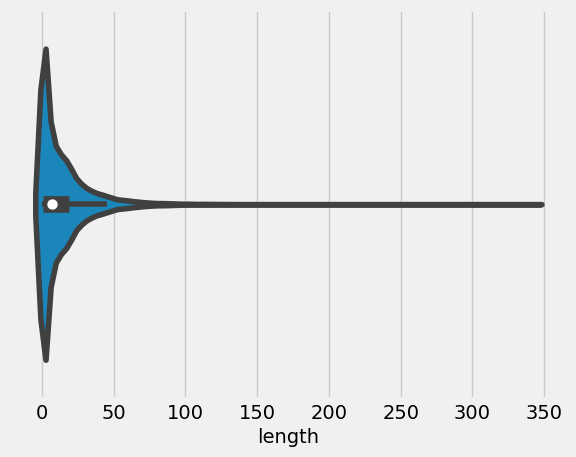

In [40]:
sns.violinplot(x=actual_sessions.length.dt.total_seconds()/60)
plt.show()

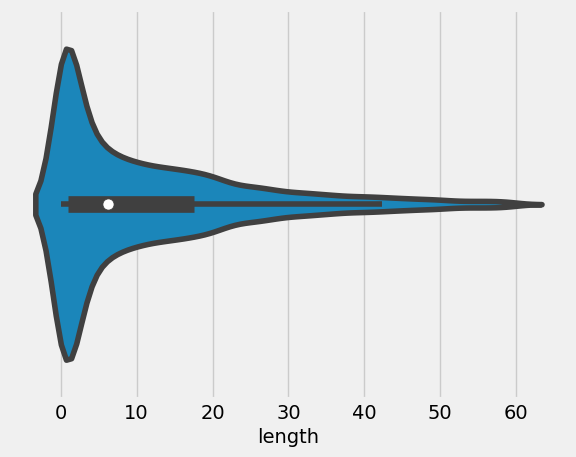

In [41]:
sns.violinplot(x=actual_sessions[actual_sessions.length < pd.Timedelta(minutes=60)].length.dt.total_seconds()/60)
plt.show()

Возьмем в качестве условных демо срез сессий продолжительностью 20-40 минут, что вероятно, позволить захватить основную массу сессий с реальной длительностью в промежутке между 30 и 60 минутами.

In [42]:
sessions['is_demo'] = False
sessions.loc[(sessions.length > pd.Timedelta(minutes=20)) & (sessions.length < pd.Timedelta(minutes=40)), 'is_demo'] = True
sessions.head(10)

,owner,account,user,username,start,end,events_cnt,length,month,is_demo
session_id,,,,,,,,,,
1.00,NaN,1118145,12100676,Idi Park,2022-02-16 07:43:16.855,2022-02-16 07:43:34.068,2,0 days 00:00:17.213000,2022-02,False
2.00,NaN,1118145,12100676,Idi Park,2022-02-21 04:58:22.630,2022-02-21 05:22:41.196,5,0 days 00:24:18.566000,2022-02,True
3.00,NaN,1118145,12100676,Idi Park,2022-02-21 07:52:31.072,2022-02-21 07:54:24.929,2,0 days 00:01:53.857000,2022-02,False
4.00,NaN,1118145,12100676,Idi Park,2022-02-23 01:57:28.138,2022-02-23 01:58:34.000,2,0 days 00:01:05.862000,2022-02,False
5.00,NaN,1118145,12100676,Idi Park,2022-02-23 03:44:50.581,2022-02-23 03:44:50.581,1,0 days 00:00:00,2022-02,False
6.00,NaN,1118145,12100676,Idi Park,2022-02-23 04:06:54.820,2022-02-23 04:15:00.571,2,0 days 00:08:05.751000,2022-02,False
7.00,NaN,1118145,12100676,Idi Park,2022-02-23 05:26:29.889,2022-02-23 05:26:29.889,1,0 days 00:00:00,2022-02,False
8.00,NaN,1118145,12100676,Idi Park,2022-02-23 08:09:12.522,2022-02-23 08:09:12.522,1,0 days 00:00:00,2022-02,False
9.00,NaN,1118145,12100683,Emi Sato,2022-02-23 05:05:15.606,2022-02-23 05:05:15.606,1,0 days 00:00:00,2022-02,False


In [43]:
sessions.is_demo.value_counts()

False    43215
True      4709
Name: is_demo, dtype: int64

## Анализ активных демо-аккаунтов

### Используемые шаблоны и пользователи

In [44]:
operations['template'] = operations.template.apply(lambda x: 'Master Demo' if x==4365873 
                                                                 else ('Marketing' if x==3075994 else 'Other'))

In [45]:
sessions = sessions.merge(operations[['acc_id','template']].dropna(subset=['acc_id']), how='left', left_on='account', right_on='acc_id')
#из-за https://github.com/pandas-dev/pandas/issues/46178
sessions = sessions.drop(columns = 'acc_id')
sessions.loc[sessions['template'].isna(), 'template'] = 'Unknown'

In [46]:
sessions.groupby('template')['account'].nunique().sort_values(ascending=False)

template
Unknown        839
Master Demo    551
Marketing      301
Name: account, dtype: int64

Положительным моментом можно назвать тот факт, что предпочтительный шаблон Master Demo уже превзошел по популярности более старую версию Marketing. Однако большое беспокойство вызывает половина активных аккаунтов с неизdестным исходным шаблоном - часть из них может быть не определена из-за недостаточности исходных данных, но также высок риск применения окончательно старевших шаблонов.

In [47]:
sessions.groupby('username')['account'].nunique().sort_values(ascending=False).head(20)

username
DemoAccount Owner      465
CEO Thomas             426
Riley Thomas           220
Julie Fox              199
Clayton Johnson        187
Account Owner          175
Idi Park               169
Cassie Stone           157
Jake Turner            134
Marketing Ronald       123
Melanie Brown          123
Emi Sato               110
VP PMO Michael          88
Valerie Markette        67
VP Pro Serv Theresa     56
Breanna Tsai            52
CMO Karen               44
CFO Amanda              43
Intro Jake              43
Agile Cynthia           38
Name: account, dtype: int64

Судя по именам пользователей, значительная доля сессий приходится на пользователей из сильно устаревших шаблонов; что касается пользователей из предпочтительного шаблона - на первом месте находится технические пользователи DemoAccount Owner и CEO Thomas, тогда как персоны, созданные для проведения демо, использовались очень редко.  
Посмотрим, сколько демо-сессий приходится на пользователей - возможно, мы увидим картину более совпадающую с желаемой.

In [48]:
sessions[sessions.is_demo].groupby('username')['username'].count().sort_values(ascending=False).head(20)

username
Account Owner        4402
Chris F              3497
CEO Thomas           2165
Brogan Pilkington    1586
DemoAccount Owner     878
Kate Sessoms          792
Nick Jordan           648
Tony Stark            530
Luke Devin            522
Kelley Matthews       456
Michael Scott         451
Lizzie Bader          399
Valerie Markette      351
Ray Flynn             343
John Alps             306
Catherine Admin       300
Richard Park          242
Intro Jake            240
Kyle Northcutt        234
Riley Thomas          214
Name: username, dtype: int64

Увы, технические пользователи лидируют также и по количеству более длительных сессий, в число которых наиболее вероятно попадают реальные демо. Также мы видим активное использование собственных или переименованных пользователей, чем выделяются сейлз-инженеры - в дальнейшем мы будем отделять их активность от более массовых команд отдела продаж.

### Частота создания и обновления аккаунтов

In [49]:
refresh_stats = operations[operations['acc_id'].isin(sessions.account)].pivot_table(index='acc_id', columns='operation_type', values='operation_id', aggfunc='count').fillna(0)
refresh_stats['total_operations'] = refresh_stats['create account'] + refresh_stats['refresh content'] + refresh_stats['refresh dates']
refresh_stats.head()

operation_type,create account,refresh content,refresh dates,total_operations
acc_id,,,,
3170767,1.00,1.00,0.00,2.00
3177928,0.00,0.00,1.00,1.00
3177985,1.00,4.00,3.00,8.00
3178531,1.00,2.00,2.00,5.00
3178538,1.00,0.00,29.00,30.00


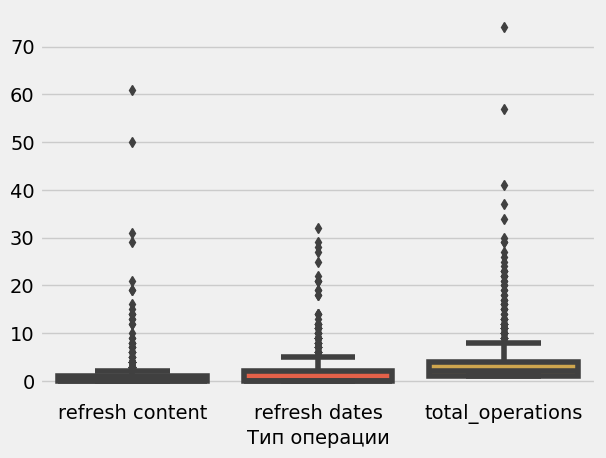

In [50]:
sns.boxplot(refresh_stats[['refresh content', 'refresh dates', 'total_operations']])
plt.xlabel('Тип операции')
plt.show()

In [51]:
refresh_stats.describe()

operation_type,create account,refresh content,refresh dates,total_operations
count,852.00,852.00,852.00,852.00
mean,0.98,0.95,1.77,3.70
std,0.13,3.74,3.70,5.73
min,0.00,0.00,0.00,1.00
25%,1.00,0.00,0.00,1.00
50%,1.00,0.00,0.00,2.00
75%,1.00,1.00,2.00,4.00
max,1.00,61.00,32.00,74.00


Как мы видим, лишь некоторые аккаунты часто получают обновления контента и дат; для более чем половины активных аккаунтов создание является единственной операцией. Также ясно видно, что обновление контента используется особенно редко.  
Это может быть приемлемо в случае создания аккаунта непосредственно перед демо и использования его на протяжении достаточно короткого времени (~ месяц).  Далее мы оценим, как обстоят дела на самом деле.

### Количество, продолжительность и частота сессий и демо

In [52]:
session_stats = sessions.pivot_table(index='account', columns='is_demo', values='user', aggfunc='count').fillna(0)
session_stats.columns = ['sessions_cnt', 'demos_cnt']
session_stats['sessions_cnt'] = session_stats.demos_cnt + session_stats.sessions_cnt
session_stats['demo_share'] = round(session_stats.demos_cnt / session_stats.sessions_cnt, 2)
session_stats

,sessions_cnt,demos_cnt,demo_share
account,,,
1118145,9.00,1.00,0.11
1258888,14.00,1.00,0.07
1364131,51.00,2.00,0.04
1364140,135.00,8.00,0.06
1377624,6.00,0.00,0.00
1603755,8.00,0.00,0.00
1861586,326.00,27.00,0.08
1906395,78.00,6.00,0.08
1929415,12.00,1.00,0.08


In [53]:
session_stats.describe()

,sessions_cnt,demos_cnt,demo_share
count,1691.00,1691.00,1691.00
mean,131.36,14.49,0.06
std,861.93,108.63,0.10
min,1.00,0.00,0.00
25%,3.00,0.00,0.00
50%,10.00,0.00,0.00
75%,32.00,2.50,0.09
max,29831.00,3611.00,1.00


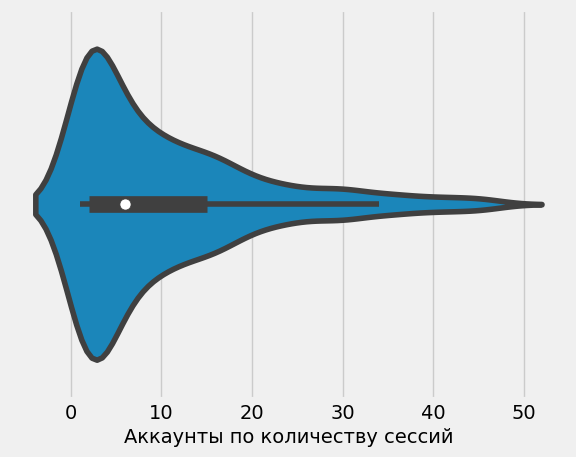

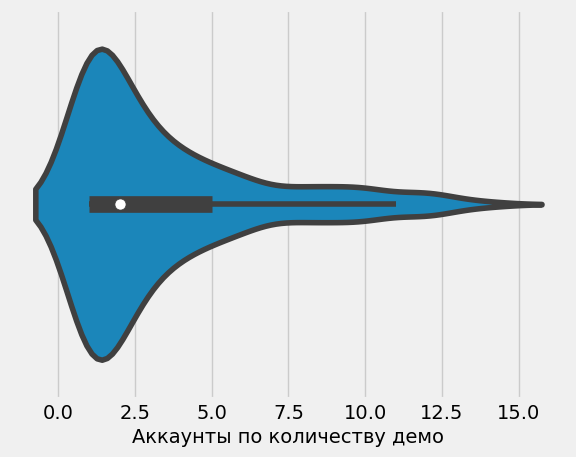

In [54]:
sns.violinplot(x=session_stats[session_stats['sessions_cnt']<session_stats.sessions_cnt.quantile(.8)].sessions_cnt)
plt.xlabel('Аккаунты по количеству сессий')
plt.show()
sns.violinplot(x=session_stats[(session_stats['demos_cnt']>0) & (session_stats['demos_cnt']<session_stats.demos_cnt.quantile(.9))].demos_cnt)
plt.xlabel('Аккаунты по количеству демо')
plt.show()

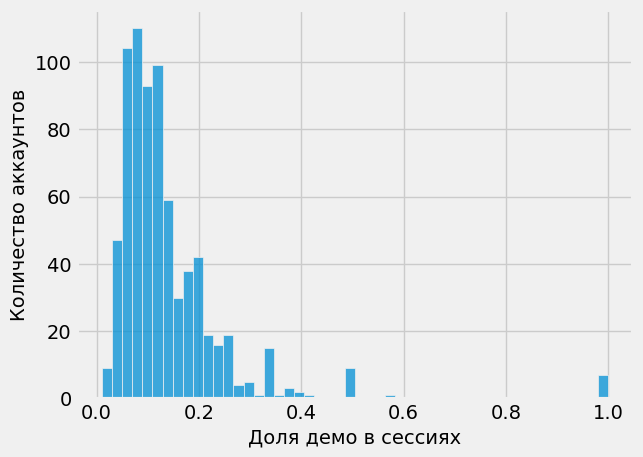

In [55]:
sns.histplot(session_stats[session_stats['demo_share']>0].demo_share)
plt.xlabel('Доля демо в сессиях')
plt.ylabel('Количество аккаунтов')
plt.show()

Неожиданно велико количество аккаунтов, где количество предполагаемых демо равно нулю. За исключением этой аномалии, аккаунты распределены похожим образом по количеству сессий и демо среди них - большинство попадает в пределы одного-двух десятков сессий или демо на аккаунт, с очень длинным хвостом из выбросов, что указывает на то, что некоторые аккаунты используются крайне активно.  
Доля демо в общем количестве сессий отдельного аккаунта как правило не превышает 20%, хотя мы и наблюдаем несколько десятков исключений.

### Сроки "жизни" аккаунтов

In [56]:
events.sample()

,fname,lname,account,user_id,event_datetime,event_type,username,account_id,demo_owner,demo_start
186140,CEO,Thomas,5580784,13393407,2022-07-15 06:49:37.386,recommended_tasks__show,CEO Thomas,5580784.00,12521018.00,2022-06-09 02:57:57.948146


In [57]:
lifetimes = events.groupby('account').agg(start=pd.NamedAgg(column='event_datetime', aggfunc='min'),
                                         end=pd.NamedAgg(column='event_datetime', aggfunc='max'))
lifetimes['days_active'] = (lifetimes.end - lifetimes.start).dt.days
lifetimes.head()

,start,end,days_active
account,,,
1118145,2022-02-16 07:43:16.855,2022-02-23 08:09:12.522,7
1258888,2022-08-24 16:51:26.153,2022-09-08 09:51:52.046,14
1364131,2022-01-11 08:42:49.418,2022-09-13 07:40:38.423,244
1364140,2022-01-04 12:12:39.716,2022-09-09 10:58:47.726,247
1377624,2022-08-24 08:41:23.447,2022-08-29 14:24:58.109,5


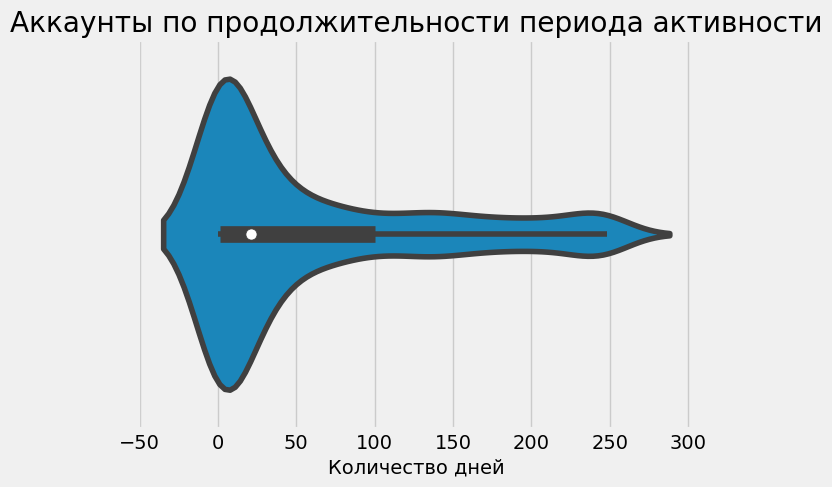

In [58]:
sns.violinplot(x=lifetimes.days_active)
plt.title(label = 'Аккаунты по продолжительности периода активности')
plt.xlabel('Количество дней')
plt.show()

Взгляд на периоды активности аккаунтов также подтверждает предположение о разделении аккаунтов на две группы - сравнительно большое количество малоиспользуемых аккаунтов, и более тонкую прослойку "долгожителей". Без данных о времени создания аккаунтов картина будет неполной, однако мы можем рассмотреть все полученные выше данные вместе, чтобы получить представление о том, насколько использование демо-аккаунтов соответствует рекомендуемому процессу.

In [59]:
combined = session_stats.merge(refresh_stats, how='inner', left_index=True, right_index=True)
combined = combined.join(lifetimes['days_active'])
combined_clean = combined[combined.sessions_cnt < combined.sessions_cnt.quantile(.9)]
combined_clean.describe()

,sessions_cnt,demos_cnt,demo_share,create account,refresh content,refresh dates,total_operations,days_active
count,766.00,766.00,766.00,766.00,766.00,766.00,766.00,766.00
mean,51.37,4.82,0.06,0.99,0.68,1.13,2.79,67.87
std,83.56,10.49,0.11,0.12,2.21,2.51,3.66,76.02
min,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,4.00,0.00,0.00,1.00,0.00,0.00,1.00,2.00
50%,15.00,0.00,0.00,1.00,0.00,0.00,1.00,35.00
75%,56.00,5.00,0.10,1.00,0.00,1.00,3.00,126.00
max,435.00,100.00,1.00,1.00,29.00,29.00,37.00,252.00


In [60]:
combined_clean.head()

,sessions_cnt,demos_cnt,demo_share,create account,refresh content,refresh dates,total_operations,days_active
3170767,6.00,0.00,0.00,1.00,1.00,0.00,2.00,0
3177928,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0
3177985,56.00,8.00,0.14,1.00,4.00,3.00,8.00,27
3178531,15.00,0.00,0.00,1.00,2.00,2.00,5.00,133
3178538,120.00,0.00,0.00,1.00,0.00,29.00,30.00,8


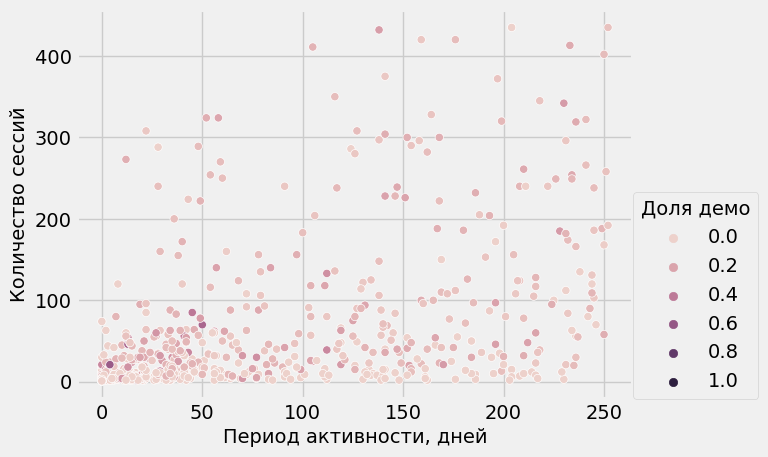

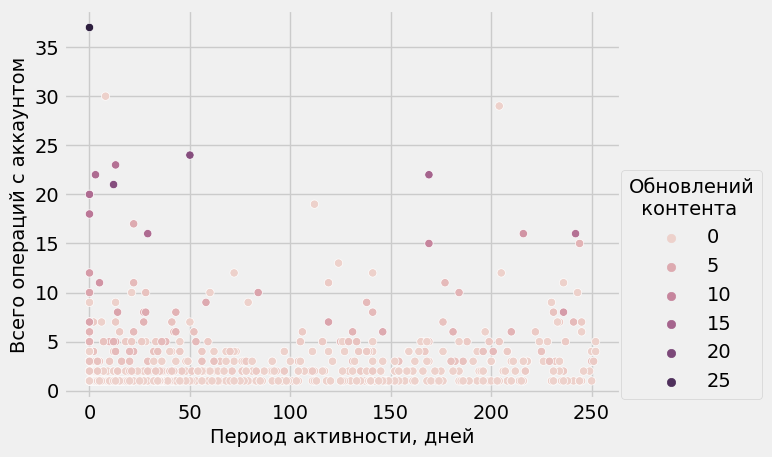

In [61]:
sns.scatterplot(data=combined_clean, x='days_active', y='sessions_cnt', hue='demo_share')
plt.xlabel('Период активности, дней')
plt.ylabel('Количество сессий')
plt.legend(loc=(1,0), title='Доля демо')
plt.show()
sns.scatterplot(data=combined_clean, x='days_active', y='total_operations', hue='refresh content')
plt.xlabel('Период активности, дней')
plt.ylabel('Всего операций с аккаунтом')
plt.legend(loc=(1,0), title='Обновлений\n  контента')
plt.show()

По двум последним графикам мы можем сделать ряд наблюдений:
- нет заметной корреляции между "продолжительности жизни" аккаунта и активностью работы в нем, выраженной в количестве сессий
- при этом более высокая доля демо наблюдается в аккаунтах с меньшими периодами активности, и имеющими количество сессий ниже среднего: это может указывать на следование принципу проведения демо в "свежих" аккаунтах и регулярное создание новых вместо обновления контента в старых
- и, как показывает второй график, как обновления дат, так и обновления контента происходят с одинаковой частотой, независимо от того, насколько долго используется аккаунт

Далее мы используем меньший срез данных (поскольку у нас есть данные об операциях и владельцах лишь половины активных аккаунтов), чтобы понять, насколько подходы к использованию демо-аккаунтов различаются у отдельных пользователей.

## Анализ активности пользователей

### Количество активных аккаунтов на пользователя, частота создания и обновления

In [62]:
sessions_clean = sessions.dropna(subset='owner')
sessions_clean.head()

,owner,account,user,username,start,end,events_cnt,length,month,is_demo,template
1530,3870076.00,3170767,6863413,Breanna Tsai,2022-05-03 04:17:11.622,2022-05-03 04:17:11.622,1,0 days 00:00:00,2022-05,False,Marketing
1531,3870076.00,3170767,6863413,Breanna Tsai,2022-05-03 04:17:11.622,2022-05-03 04:17:11.622,1,0 days 00:00:00,2022-05,False,Marketing
1532,3870076.00,3170767,6863413,Breanna Tsai,2022-05-03 21:19:06.671,2022-05-03 21:19:06.671,1,0 days 00:00:00,2022-05,False,Marketing
1533,3870076.00,3170767,6863413,Breanna Tsai,2022-05-03 21:19:06.671,2022-05-03 21:19:06.671,1,0 days 00:00:00,2022-05,False,Marketing
1534,3870076.00,3170767,6863413,Breanna Tsai,2022-05-03 23:21:46.381,2022-05-03 23:22:26.265,2,0 days 00:00:39.884000,2022-05,False,Marketing


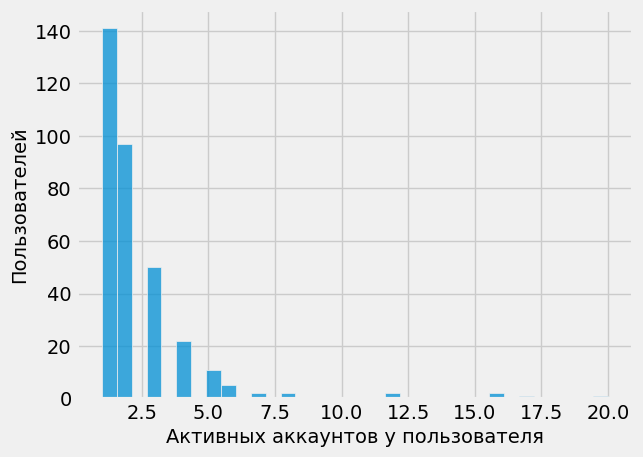

In [63]:
user_stats = sessions_clean.groupby('owner')['account'].nunique()
sns.histplot(user_stats)
plt.xlabel('Активных аккаунтов у пользователя')
plt.ylabel('Пользователей')
plt.show()

Как мы видим, большинство пользователей обходится лишь несколькими аккаунтами за три месяца наблюдений - что означает использование одних и тех же аккаунтов в течение продолжительного времени. С учетом крайне редких обновлений контента, обнаруженных выше, это указывает на еще одну крупную проблему.

In [64]:
combined_clean = combined_clean.merge(operations[['acc_id','owner']], how='inner', left_index=True, right_on = 'acc_id').dropna(subset=['owner']).drop_duplicates()

In [65]:
owner_operations = combined_clean.groupby('owner')[['refresh content','refresh dates']].mean()
owner_operations.head()

,refresh content,refresh dates
owner,,
937806,0.18,0.06
1196135,4.00,3.00
1237337,0.00,0.00
1288532,1.00,0.50
1497061,0.00,0.00


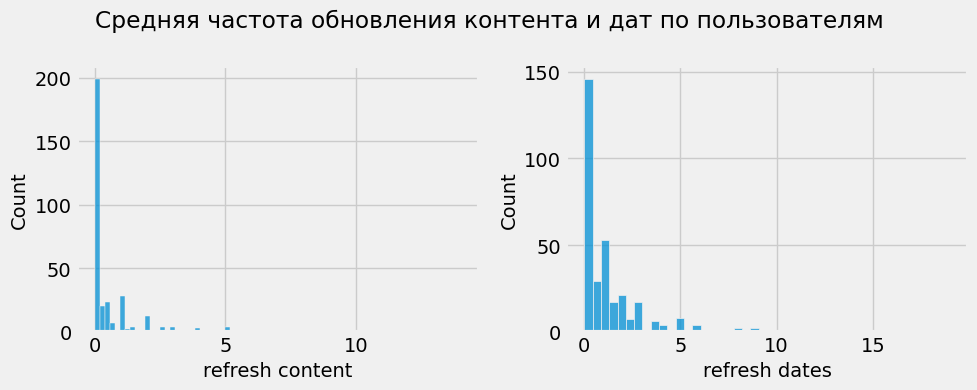

In [66]:
plt.figure(figsize=(10,4))
plt.suptitle('Средняя частота обновления контента и дат по пользователям')
plt.subplot(1,2,1)
sns.histplot(data=owner_operations['refresh content'])
plt.subplot(1,2,2)
sns.histplot(data=owner_operations['refresh dates'])
plt.tight_layout()
plt.show()

Взгляд на еще один срез данных подтверждает предположение о том, что активно обновляют свои аккаунты лишь немногие из пользователей.

### Количество и частота сессий и демо на пользователя

In [67]:
owners_sessions = combined_clean.groupby('owner')[['sessions_cnt', 'demos_cnt']].sum()
owners_sessions.head()

,sessions_cnt,demos_cnt
owner,,
937806,576.00,41.00
1196135,56.00,8.00
1237337,119.00,4.00
1288532,8.00,1.00
1497061,93.00,4.00


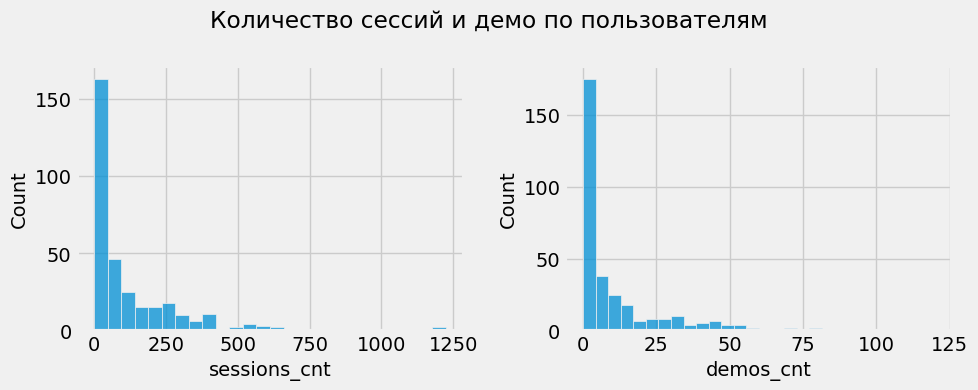

In [68]:
plt.figure(figsize=(10,4))
plt.suptitle('Количество сессий и демо по пользователям')
plt.subplot(1,2,1)
sns.histplot(data=owners_sessions['sessions_cnt'])
plt.subplot(1,2,2)
sns.histplot(data=owners_sessions['demos_cnt'])
plt.tight_layout()
plt.show()

За почти девять месяцев наблюдений мы видим очень малое количество демо у большинства пользователей - даже с поправкой на недавно нанятых работников, которые проводили демо не на протяжении всего периода наблюдений, соотношение демо и сессий выглядит неправдоподобно.  
Отчасти это может быть вызвано исключением из анализа значительной части самых активных пользователей, но также заставляет нас вспомнить о том, что сейчас мы можем делать только очень приблизительную оценку активности пользователей.

### Степень использования рекомендуемого шаблона и пользователей

Мы уже выяснили, что рекомендуемый шаблон используется гораздо меньше, чем предполагалось, а половина активных аккаунтов безнадежно устарели.  
Имеющиеся в нашем распоряжении данные позволяют также сделать примерную оценку степени использования технических (т.е. не предназначенных для проведения демо) пользователей внутри основного аккаунта (Master Demo).

In [69]:
sessions_mdt = sessions_clean[sessions_clean['template']=='Master Demo']
sessions_mdt['is_technical'] = sessions_mdt.username.apply(lambda x: True if x=='DemoAccount Owner' 
                                                           else(True if x=='CEO Thomas' else False))
sessions_mdt.sample(5)

,owner,account,user,username,start,end,events_cnt,length,month,is_demo,template,is_technical
146930,11699319.00,5117045,11878960,Brogan Pilkington,2022-02-24 06:40:45.773,2022-02-24 07:53:48.445,19,0 days 01:13:02.672000,2022-02,False,Master Demo,False
72911,7259164.00,4585467,10462849,Nick Jordan,2022-04-20 10:02:42.903,2022-04-20 10:19:00.085,2,0 days 00:16:17.182000,2022-04,False,Master Demo,False
110666,11109555.00,4990711,11546109,Chris F,2022-02-09 08:37:26.615,2022-02-09 09:13:57.616,10,0 days 00:36:31.001000,2022-02,True,Master Demo,False
107103,11109555.00,4990711,11546107,Geoff Smith,2022-07-12 23:02:47.164,2022-07-12 23:02:47.164,1,0 days 00:00:00,2022-07,False,Master Demo,False
148055,11699319.00,5117045,11878960,Brogan Pilkington,2022-03-30 08:58:16.806,2022-03-30 09:05:08.622,8,0 days 00:06:51.816000,2022-03,False,Master Demo,False


In [70]:
tech_usage = sessions_mdt.groupby(['owner','is_technical']).agg(events = pd.NamedAgg(column='events_cnt', aggfunc='sum'),
                                                               sessions = pd.NamedAgg(column='template', aggfunc='count'),
                                                               demos = pd.NamedAgg(column='is_demo', aggfunc='sum')).unstack(-1).fillna(0)
tech_usage.head()

events        sessions       demos      
is_technical   False  True     False True  False True 
owner                                                 
937806.00    1134.00 353.00   322.00 73.00 22.00  6.00
1237337.00    260.00   0.00   119.00  0.00  4.00  0.00
1288532.00      0.00  14.00     0.00  4.00  0.00  1.00
1708164.00     21.00  72.00     9.00 21.00  0.00  3.00
1787242.00     11.00 156.00     3.00 94.00  0.00  0.00

In [71]:
for col in tech_usage.columns:
    colname = col[0] + '_tech_share'
    tech_usage[colname] = tech_usage[col[0]][True] / (tech_usage[col[0]][True] + tech_usage[col[0]][False])
tech_usage.head()

events        sessions       demos      events_tech_share  \
is_technical   False   True    False  True False True                     
owner                                                                     
937806.00    1134.00 353.00   322.00 73.00 22.00 6.00              0.24   
1237337.00    260.00   0.00   119.00  0.00  4.00 0.00              0.00   
1288532.00      0.00  14.00     0.00  4.00  0.00 1.00              1.00   
1708164.00     21.00  72.00     9.00 21.00  0.00 3.00              0.77   
1787242.00     11.00 156.00     3.00 94.00  0.00 0.00              0.93   

             sessions_tech_share demos_tech_share  
is_technical                                       
owner                                              
937806.00                   0.18             0.21  
1237337.00                  0.00             0.00  
1288532.00                  1.00             1.00  
1708164.00                  0.70             1.00  
1787242.00                  0.97              NaN

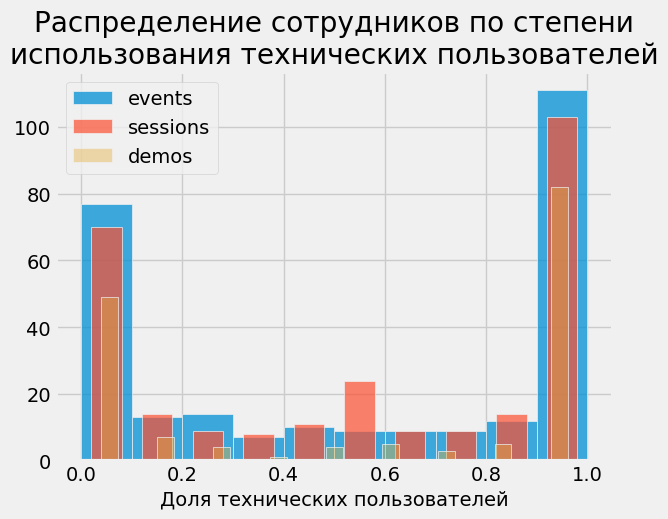

In [72]:
plt.title(label='Распределение сотрудников по степени\nиспользования технических пользователей')
sns.histplot(data=tech_usage, x=tech_usage.events_tech_share, label='events')
sns.histplot(data=tech_usage, x=tech_usage.sessions_tech_share, label='sessions', alpha=.7, shrink=.6)
sns.histplot(data=tech_usage, x=tech_usage.demos_tech_share, label='demos', alpha=.4, shrink=.3)
plt.xlabel('Доля технических пользователей')
plt.ylabel('')
plt.legend()
plt.show()

Как мы и подозревали, большинство пользователей пользуется только техническими или преимущественно техническими пользователями - как просто в работе, так и непосредственно для демо. То, насколько похоже распределены данные, также может указывать на то, что сотрудники выбирают того или иного пользователя для выполнения всех своих задач - как подготовки, так и проведения демо для потенциальных покупателей.  
При этом заметный пик нулевой доли использования технических пользователей в значительной степени объясняется тем, что мы отметили как технических лишь двух пользователей, и лишь по имени - с учетом того уровня активности "желательных" пользователей, который мы видели выше, мы вынуждены вопронимать этот пик достаточно пессимистично.

## Выводы и рекомендации

Наш проект преследовал две цели: изучить общую активность в демо-аккаунтах, а также оценить возможность оценки качества конкретных демо на основании продуктовых событий. Для первичного исследования мы использовали события только из группы так называемой домашней страницы, поскольку она является отправной точкой большинства сессий, а также промежуточным пунктом при навигации между другими частями продукта.  

Мы сгруппировали близкие по времени события в условные "сессии", что позволило нам более детально рассмотреть активность в различных аккаунтах.  

**Использование демо аккаунтов**

Имея доступ к записям о событиях в демо аккаунтах, мы смогли выделить именно те, в которых велась работа за 8,5 месяцев 2022 года. В результате мы смогли сделать ряд наблюдений о том, как в действительности используются демо-аккаунты:
- почти половина активных аккаунтов были созданы из окончательно устаревших шаблонов, что означает как минимум частичное игнорирование наработок последних лет, нацеленных на проведение эффективных демо
- среди тех, кто пользуется новейшим шаблоном, следование рекомендациям также оставляет желать лучшего: большинство сотрудников игнорирует специально созданных для демо пользователей, выполняя всю работу от лица технических пользователей, включая непосредственно демо
- регулярные обновления всего содержимого аккаунтов и дат в частности встречаются так же редко, причем независимо от того, насколько давно используется аккаунт
- степень активности внутри аккаунтов неравномерна, мы наблюдаем большую массу умеренно или минимально активных аккаунтов, и меньшее количество крайне активных аккаунтов. Рассматривая сроки активности аккаунтов, мы отмечаем, что прямой корреляции между сроками активности и интенсивностью использования не наблюдается  

**Перспективы оценки качества демо по продуктовым событиям**  

В рамках этого проекта мы могли произвести лишь приблизительную оценку активности, но полученные данные подтверждают жизнеспособность такого подхода.  
Включение дополнительных групп продуктовых событий позволит с одной стороны более точно определить границы активных сессий, а с другой - как минимум оценить степень демонстрации необходимого "минимума" функций, продолжительности и динамики проведенных демо.  

**Рекомендации**  

1. Дополнить исследование данными о событиях из других групп, а также о сотрудниках-владельцах аккаунтов и времени создания самих аккаунтов.
2. Доработать механизмы определения сессий и демо - как за счет включения данных о большем диапазоне событий, так и за счет сверки с другими источниками (SFDC, календари, Zoom)
3. Обратить внимание отдела обучения и руководителей команд продаж на использование устаревших аккаунтов, технических пользователей и недостаточную частоту обновления содержимого аккаунтов
    1. Изучить обнаруженные проблемы с точки зрения пользовательского опыта - возможно, причиной являются скрытые неудобства в использовании демо-аккаунтов. Проведение интервью самых "злостных нарушителей" демо-инженерами может дать необходимый контекст
4. Изучить корреляцию между паттернами использования демо аккаунтов и успехами конкретных специалистов по продажам - не исключено, что обнаруженные нами несоответствия процессам не приводят к ухудшению результатов, или даже наоборот